In [1]:
import python_inventory as pyinv
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score

In [2]:
X, Y = load_digits(return_X_y=True)

In [25]:
print(X.shape)

(1797, 64)


In [3]:
YB = label_binarize(Y, classes=np.arange(0,10))

In [4]:
print(YB)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]


In [5]:
YB8 = 2.0 * YB[:,8] - 1.0
YB8

array([-1., -1., -1., ...,  1., -1.,  1.])

In [6]:
print(Y[Y == 8])
print(YB8[Y ==8])
print(YB8[Y != 8])

[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[-1. -1. -1. ... -1. -1. -1.]


In [7]:
W8 = np.ones_like(YB8)
W8[Y == 8] = 10
W8

array([ 1.,  1.,  1., ..., 10.,  1., 10.])

In [22]:
m = 20
body = pyinv.NN()
models = []
for j in range(m):
    mod = pyinv.SigmaNeuronModel(pyinv.Sigmoidal(), 64)
    models.append(mod)
layer = pyinv.FuncLayer(models)
body.add(layer)

head = pyinv.LinearModel(m)

nn = pyinv.ModelNN(head, body)

nn.init_param()

In [23]:
loss_hinge = pyinv.ErrorLoss(pyinv.Square())
am = pyinv.ArithMean()
risk = pyinv.Risk(nn, loss_hinge, am)

gd = pyinv.GradientDescent(risk, h=0.2, n_iter=3, tol=1.0e-9)

3


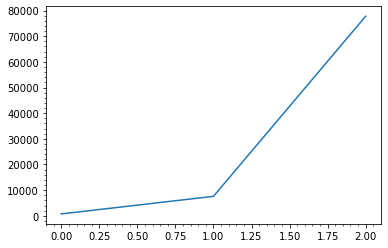

In [24]:
gd.fit(X, YB8)
print(gd.K)

plt.plot(gd.rvals)
plt.minorticks_on()
plt.show()

In [21]:
YB8_p = np.sign(nn.evaluate_all(X))

In [12]:
print(sum(YB8_p == 1.))
print(sum(YB8_p != 1.))

1797
0


In [13]:
print(accuracy_score(YB8[Y == 8], YB8_p[Y == 8]))
print(accuracy_score(YB8[Y != 8], YB8_p[Y != 8]))

1.0
0.0


In [14]:
YB8

array([-1., -1., -1., ...,  1., -1.,  1.])